### Q1) Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/data) and answer the following questions :

#### 1.1) Perform k-means clustering over this dataset using Manhattan distance as the distance-measure.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
mall_customer_data = pd.read_csv('Mall_Customers.csv')
mall_customer_data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


###### Plotting multiple histograms

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual_Income_(k$)'}>,
        <AxesSubplot:title={'center':'Spending_Score'}>]], dtype=object)

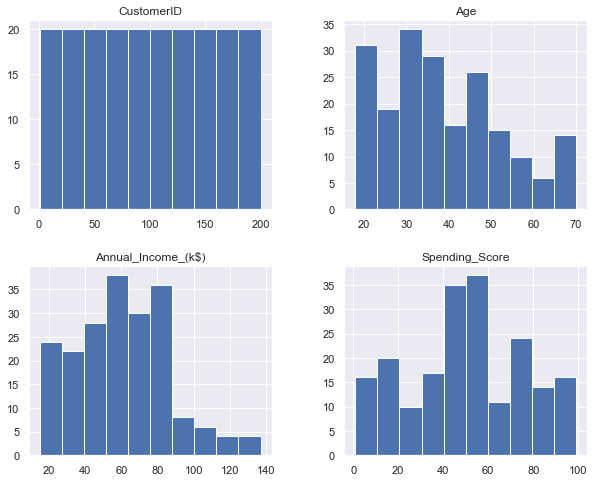

In [42]:
mall_customer_data.hist(figsize=(10, 8))

##### First encode the Genre using labelencoder

In [43]:
mall_customer_encoded = mall_customer_data.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mall_customer_encoded['Genre'] = le.fit_transform(mall_customer_encoded['Genre'])

##### Standardizing the data to avoid features acting as a weight

In [44]:
from sklearn.preprocessing import StandardScaler
mall_customer_norm = StandardScaler().fit_transform(mall_customer_encoded)
mall_customer_scaled_df = pd.DataFrame(mall_customer_norm, index=mall_customer_data.index, columns=mall_customer_data.columns)
mall_customer_scaled_df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


##### scipy implementation for hierarchical clustering

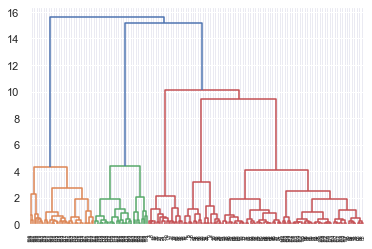

In [45]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Selecting Annual Income and Spending Scores values only
X = mall_customer_scaled_df.iloc[:,[3,4]].values
link_c = linkage(X, method='ward')
plt.figure()
dendrogram(link_c)
plt.show()

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

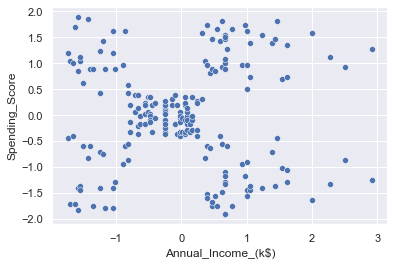

In [46]:
import seaborn as sns
sns.scatterplot(x=mall_customer_scaled_df['Annual_Income_(k$)'],y=mall_customer_scaled_df['Spending_Score'])

##### Find Manhattan distance single value (Method 1)

In [47]:
def manhattan_distance(point1, point2):
    return np.sum(np.absolute(point1 - point2))

In [48]:
manhattan_distance(mall_customer_scaled_df['Annual_Income_(k$)'],mall_customer_scaled_df['Spending_Score'])

204.01909294496613

##### Find Manhattan distance single value (Method 2 - In Scipy, we call it cityblock)

In [49]:
from scipy.spatial.distance import cityblock
cityblock(mall_customer_scaled_df['Annual_Income_(k$)'],mall_customer_scaled_df['Spending_Score'])

204.01909294496613

##### Elbow Method to find Optimum value of K

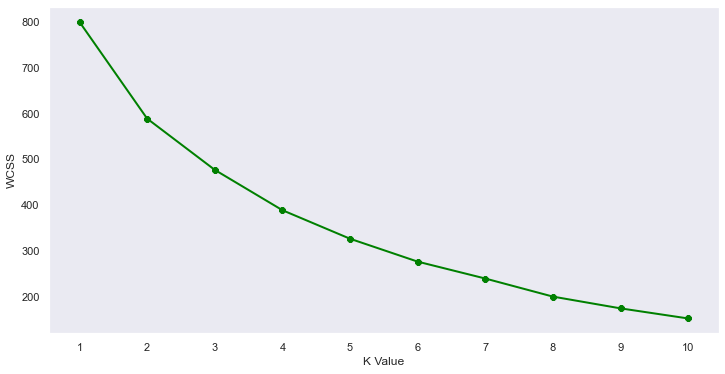

In [50]:
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(mall_customer_scaled_df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="green", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

The optimal K value = 5 using the elbow method

##### K-mean clustering using Manhattan distance as the distance-measure

In [51]:
#to install pyclustering library
#!pip install pyclustering

In [113]:
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from scipy.spatial import distance
from pyclustering.cluster.kmeans import kmeans

In [114]:
centers = kmeans_plusplus_initializer(mall_customer_scaled_df, 5).initialize()
manhattan_dist_metric = distance_metric(type_metric.MANHATTAN)
kmeans_instance = kmeans(mall_customer_scaled_df,initial_centers=centers , metric= manhattan_dist_metric);kmeans_instance.process()
kmean_clusters_using_manhattan = kmeans_instance.get_clusters()

#### 1.2) After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as ‘Labels’ and fill it with cluster number assigned by k-means algorithm.

In [115]:
mall_customer_scaled_df['Labels'] = 0
for i in range(len(kmean_clusters_using_manhattan)):
    mall_customer_scaled_df.loc[kmean_clusters_using_manhattan[i], 'Labels'] = i

In [116]:
labels = mall_customer_scaled_df["Labels"].values

In [117]:
mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==0]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
126,0.458999,1.128152,0.297832,0.398489,-0.590088,0
128,0.493641,1.128152,1.446099,0.398489,-1.521805,0
130,0.528282,1.128152,0.584899,0.398489,-1.599448,0
134,0.597565,1.128152,-1.352802,0.474828,-1.754735,0
138,0.666848,1.128152,-1.424569,0.512997,-1.560627,0
144,0.770772,1.128152,-0.993969,0.627505,-1.482984,0
146,0.805414,1.128152,0.656665,0.627505,-0.551266,0
150,0.874697,1.128152,0.297832,0.665675,-1.288876,0
156,0.978621,1.128152,-0.132768,0.665675,-1.910021,0
158,1.013262,1.128152,-0.348068,0.665675,-1.910021,0


In [118]:
mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==1]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,1
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,1
8,-1.584846,1.128152,1.804932,-1.586321,-1.832378,1
10,-1.550205,1.128152,2.020232,-1.586321,-1.405340,1
14,-1.480922,1.128152,-0.132768,-1.548152,-1.444162,1
15,-1.463601,1.128152,-1.209269,-1.548152,1.118061,1
17,-1.428960,1.128152,-1.352802,-1.509983,0.613381,1
18,-1.411639,1.128152,0.943732,-1.433644,-0.823017,1
20,-1.376998,1.128152,-0.276302,-1.395474,-0.590088,1
21,-1.359677,1.128152,-0.993969,-1.395474,0.885132,1


In [119]:
mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==2]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
123,0.407037,1.128152,0.010765,0.322150,1.583920,2
127,0.476320,1.128152,0.082532,0.398489,1.739206,2
129,0.510961,1.128152,-0.061002,0.398489,0.962775,2
131,0.545603,1.128152,0.010765,0.398489,0.962775,2
135,0.614886,-0.886405,-0.706902,0.474828,1.467455,2
137,0.649527,1.128152,-0.491602,0.474828,0.885132,2
141,0.718810,1.128152,-0.491602,0.551167,1.661563,2
143,0.753452,-0.886405,-0.491602,0.589336,1.428633,2
145,0.788093,1.128152,-0.778669,0.627505,1.816849,2
147,0.822734,-0.886405,-0.491602,0.627505,0.923953,2


In [120]:
mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==3]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,3
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,3
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,3
5,-1.636808,-0.886405,-1.209269,-1.662660,1.001596,3
6,-1.619488,-0.886405,-0.276302,-1.624491,-1.715913,3
7,-1.602167,-0.886405,-1.137502,-1.624491,1.700384,3
9,-1.567526,-0.886405,-0.635135,-1.586321,0.846310,3
11,-1.532884,-0.886405,-0.276302,-1.586321,1.894492,3
12,-1.515563,-0.886405,1.374332,-1.548152,-1.366519,3
13,-1.498243,-0.886405,-1.065735,-1.548152,1.040418,3


In [121]:
mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==4]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
79,-0.355075,-0.886405,0.728432,-0.250391,-0.318337,4
83,-0.285792,-0.886405,0.513132,-0.250391,-0.240694,4
86,-0.233830,-0.886405,1.159032,-0.135883,0.302808,4
87,-0.216509,-0.886405,-1.209269,-0.135883,0.186343,4
88,-0.199188,-0.886405,-0.348068,-0.097714,0.380451,4
89,-0.181868,-0.886405,0.800199,-0.097714,-0.163051,4
90,-0.164547,-0.886405,2.091999,-0.059544,0.186343,4
93,-0.112585,-0.886405,0.082532,-0.021375,-0.395980,4
94,-0.095264,-0.886405,-0.491602,-0.021375,-0.318337,4
96,-0.060623,-0.886405,0.584899,-0.021375,-0.124229,4


In [122]:
labels_count = {'cluster_number': ['0 Labels', '1 Labels', '2 Labels', '3 Labels', '4 Labels'],
        'total_count': [len(mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==0]), len(mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==1]),
                  len(mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==2]), len(mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==3]), len(mall_customer_scaled_df[mall_customer_scaled_df["Labels"]==4])]}
labels_count_df = pd.DataFrame(labels_count)
labels_count_df

,cluster_number,total_count
0,0 Labels,26
1,1 Labels,50
2,2 Labels,36
3,3 Labels,48
4,4 Labels,40


#### 1.3 Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression, decision trees, random forest, and Naive Bayes algorithm.

In [123]:
mall_df_x = mall_customer_scaled_df.iloc[:,[3,4]].values;mall_df_y = mall_customer_scaled_df['Labels'].values

<b><i><h20> Splitting data into training-test set</h20></i></b>

In [130]:
from sklearn.model_selection import train_test_split; from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(mall_df_x, mall_df_y, test_size = 0.2, random_state = 0)

In [131]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
y_pred_logistic = lr.predict(X_test)
logistic_accuracy = metrics.accuracy_score(y_test, y_pred_logistic)

In [132]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_decision = clf_en.predict(X_test)
decision_tree_accuracy = metrics.accuracy_score(y_test, y_pred_decision)

In [133]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_rf)

In [134]:
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
y_pred_nb = nbModel.predict(X_test)
nb_accuracy = metrics.accuracy_score(y_test, y_pred_nb)

In [135]:
accuracy_score_raw = {'Classification Algorithms': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Naive Bayes'],
        'Accuracy Score': [logistic_accuracy, decision_tree_accuracy,random_forest_accuracy, nb_accuracy]}
accuracy_score_df = pd.DataFrame(accuracy_score_raw)
accuracy_score_df

,Classification Algorithms,Accuracy Score
0,Logistic Regression,0.725
1,Decision Tree Classifier,0.700
2,Random Forest Classifier,0.600
3,Naive Bayes,0.700


<font color='green'>**Ans 1.3: Logistic Regression has 0.725 accuracy score which is the optimum score through-out**</font>

#### 1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of clusters, like is the clusters or groups are making sense or not ?

##### <I>When all clusters in a clustering result contains only data points that belong to the same class, then the result is homogeneous,<br/>we will check homogeneity score with different clusters</I>

<I>Homogeneity Score with 1 cluster</I>

In [141]:
import sklearn
kmeans = sklearn.cluster.KMeans(n_clusters=1, init='random', n_init=1, verbose=0)
kmeans.fit(mall_customer_scaled_df[["Spending_Score","Annual_Income_(k$)"]])
one_labels = kmeans.labels_
correct_labels = sum(labels == one_labels)
from sklearn.metrics import homogeneity_score
print("%.3f" % homogeneity_score(labels, one_labels))

0.000


<I>Homogeneity Score with 2 cluster</I>

In [142]:
kmeans = sklearn.cluster.KMeans(n_clusters=2, init='random', n_init=1, verbose=0)
kmeans.fit(mall_customer_scaled_df[["Spending_Score","Annual_Income_(k$)"]])
one_labels = kmeans.labels_
correct_labels = sum(labels == one_labels)
from sklearn.metrics import homogeneity_score
print("%.3f" % homogeneity_score(labels, one_labels))

0.258


<I>Homogeneity Score with 3 cluster</I>

In [143]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, init='random', n_init=1, verbose=0)
kmeans.fit(mall_customer_scaled_df[["Spending_Score","Annual_Income_(k$)"]])
one_labels = kmeans.labels_
correct_labels = sum(labels == one_labels)
from sklearn.metrics import homogeneity_score
print("%.3f" % homogeneity_score(labels, one_labels))

0.482


<I>Homogeneity Score with 4 cluster</I>

In [144]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, init='random', n_init=1, verbose=0)
kmeans.fit(mall_customer_scaled_df[["Spending_Score","Annual_Income_(k$)"]])
one_labels = kmeans.labels_
correct_labels = sum(labels == one_labels)
from sklearn.metrics import homogeneity_score
print("%.3f" % homogeneity_score(labels, one_labels))

0.501


<I>Homogeneity Score with 5 cluster</I>

In [145]:
kmeans = sklearn.cluster.KMeans(n_clusters=5, init='random', n_init=1, verbose=0)
kmeans.fit(mall_customer_scaled_df[["Spending_Score","Annual_Income_(k$)"]])
one_labels = kmeans.labels_
correct_labels = sum(labels == one_labels)
from sklearn.metrics import homogeneity_score
print("%.3f" % homogeneity_score(labels, one_labels))

0.514


<font color='green'>**Ans 1.4: Our homogeneity score should lie between 0 to 1, After analyzing the result, I can say with 5 clusters, we are getting high homogeneity score (0.514) throughout, which is nearby to 1 and we already know 5 is our most optimum ncluster after analyzing elbrow method plot**</font>

### Q2) Consider the breast_cancer dataset given in the sklearn library and answer the following questions.

#### 2.1) Import the breast_cancer dataset from sklearn.datasets library.

<I>Importing load_breast_cancer dataset using sklearn.datasets.library</I>

In [74]:
import sklearn
breast_cancer_raw_data = sklearn.datasets.load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer_raw_data.data, columns=breast_cancer_raw_data.feature_names)
breast_cancer_df['target'] = breast_cancer_raw_data.target

In [75]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### 2.2 Perform PCA (2 components) and LDA (1 components) over the dataset. (20 Points)

##### Divide dataset into breast_cancer_x and breast_cancer_y

In [76]:
breast_cancer_x = breast_cancer_df.iloc[:, :-1] #will consider every feature except 'target' values
breast_cancer_y = breast_cancer_df.target.values #will use only 'target' column value

##### Feature Scaling - Standardizing the breast_cancer_x using StandardScaler

In [77]:
breast_cancer_x = StandardScaler().fit_transform(breast_cancer_x)

<b><i><h20> Splitting data into training-test set</h20></i></b>

In [78]:
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(breast_cancer_x, breast_cancer_y, test_size = 0.3, random_state = 0)

##### PCA with 2 components

In [79]:
pca_two_comp = PCA(n_components=2)
pca_x = pca_two_comp.fit(breast_cancer_x).transform(breast_cancer_x)
pca_x_train = pca_two_comp.fit_transform(pca_x_train)
pca_x_test = pca_two_comp.transform(pca_x_test)

##### Training pca data and predicting results using RandomForestClassifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
pca_rfc_model = RandomForestClassifier(max_depth = 2, random_state = 0)
pca_rfc_model.fit(pca_x_train, pca_y_train)
pca_y_pred = pca_rfc_model.predict(pca_x_test) #predicting results

In [81]:
pca_confusion_matrix = confusion_matrix(pca_y_test, pca_y_pred)
print("PCA's Confusion Matrix:")
print(pca_confusion_matrix)

PCA's Confusion Matrix:
[[55  8]
 [10 98]]


In [82]:
print(f"PCA's classification report :")
print("\n")
print(classification_report(pca_y_test, pca_y_pred))

PCA's classification report :


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        63
           1       0.92      0.91      0.92       108

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.89      0.90       171



In [85]:
print('Accuracy of PCA with 2 components '+ str(accuracy_score(pca_y_test, pca_y_pred)))

Accuracy of PCA with 2 components 0.8947368421052632


##### LDA with 1 component

<b><i><h20> Splitting data into training-test set</h20></i></b>

In [86]:
lda_x_train, lda_x_test, lda_y_train, lda_y_test = train_test_split(breast_cancer_x, breast_cancer_y, test_size = 0.3, random_state = 0)

##### Feature Scaling - Standardizing the lda_x_train and lda_x_test using StandardScaler

In [87]:
lda_x_train = StandardScaler().fit_transform(lda_x_train)
lda_x_test = StandardScaler().fit_transform(lda_x_test)

In [88]:
#lda with one component
lda_one_comp = LDA(n_components = 1)
lda_x_train = lda_one_comp.fit_transform(lda_x_train, lda_y_train)
lda_x_test = lda_one_comp.transform(lda_x_test)

##### Training LDA data and predicting results using RandomForestClassifier

In [89]:
lda_rfc_model = RandomForestClassifier(max_depth = 2, random_state = 0)
lda_rfc_model.fit(lda_x_train, lda_y_train)
lda_y_pred = lda_rfc_model.predict(lda_x_test) #predicting results

In [90]:
lda_confusion_matrix = confusion_matrix(lda_y_test, lda_y_pred)
print("LDA's Confusion Matrix:")
print(lda_confusion_matrix)

LDA's Confusion Matrix:
[[ 58   5]
 [  3 105]]


In [91]:
print(f"LDA's classification report :")
print("\n")
print(classification_report(lda_y_test, lda_y_pred))

LDA's classification report :


              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [92]:
print('Accuracy of LDA with 1 component '+ str(accuracy_score(lda_y_test, lda_y_pred)))

Accuracy of LDA with 1 component 0.9532163742690059


<font color='green'>**Ans 2.3: We can notice that although we were using 1 component in LDA compare to PCA where we were using 2 components, we are still getting better accuracy using LDA compare to PCA**</font>

#### 2.3 Visualise the components and see if its able to segregate the class label in breast_cancer dataset.

In [93]:
breast_cancer_df_label_name = breast_cancer_df.copy()
breast_cancer_df_label_name['diagnosis'] = np.where(breast_cancer_df_label_name['target']!= 1, 'malignant', 'benign')

In [94]:
def class_label_plotting(condition1,condition2):
    sns.distplot(condition1, bins=bins, color='red', label='Malignant')
    sns.distplot(condition2, bins=bins, color='blue', label='Benign')  

In [95]:
breast_cancer_df_label_name.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'diagnosis'],
      dtype='object')

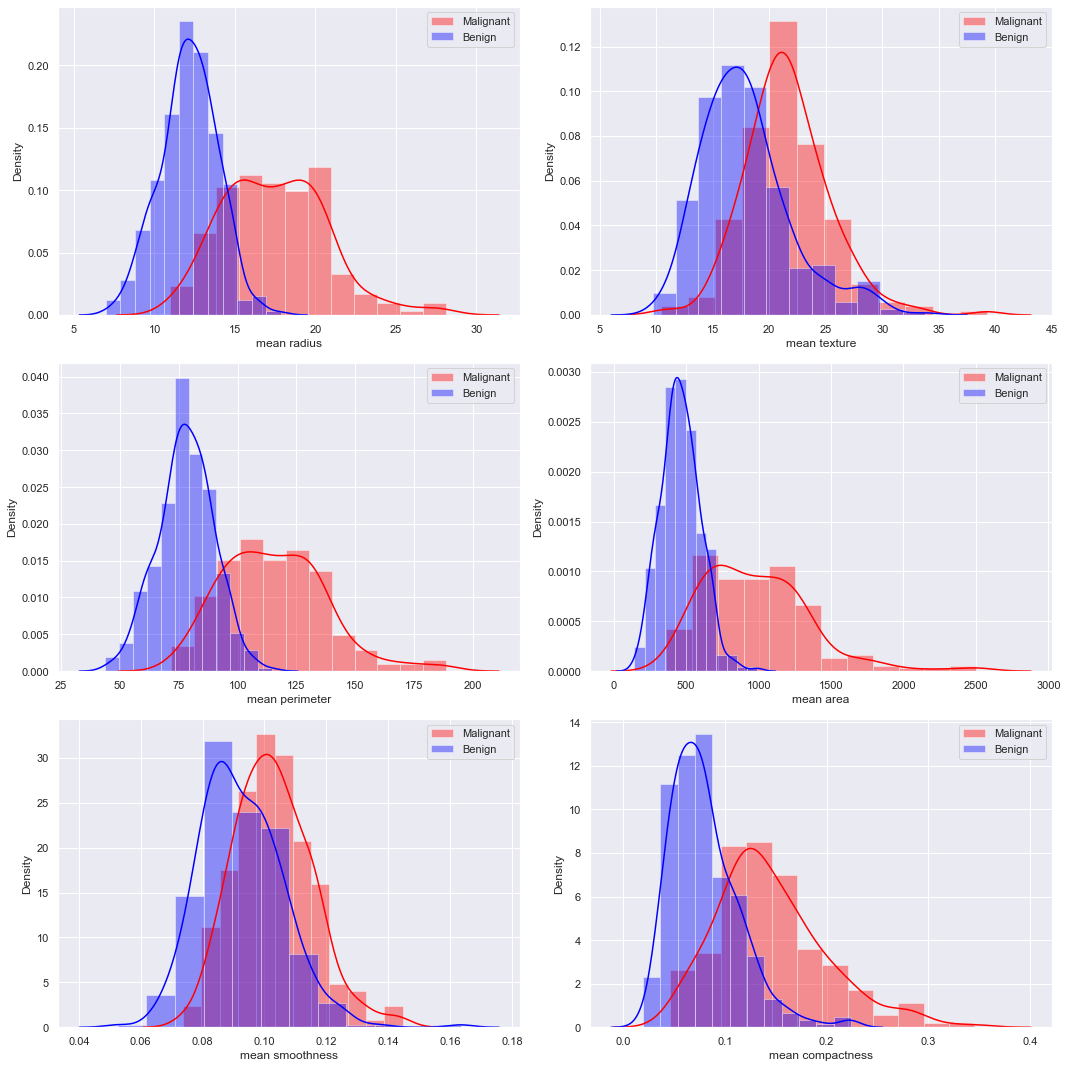

In [96]:
bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean radius'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean radius'])
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean texture'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean texture'])
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean perimeter'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean perimeter'])
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean area'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean area'])
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean smoothness'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean smoothness'])
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean compactness'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean compactness'])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

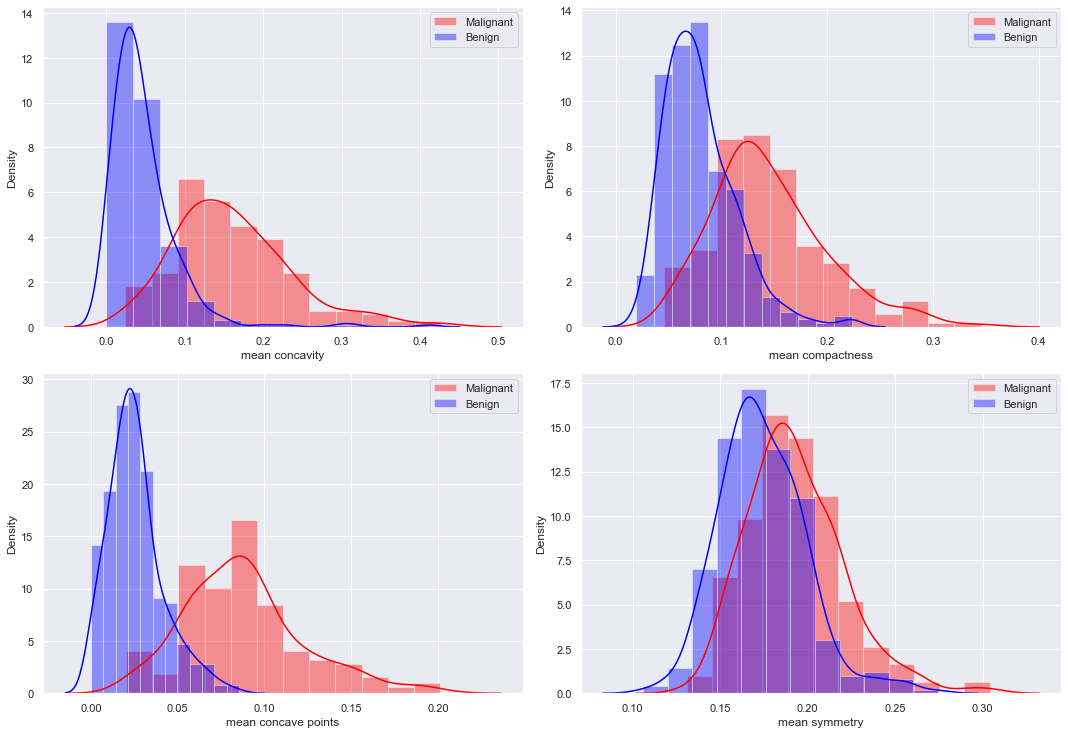

In [97]:
bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean concavity'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean concavity'])
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean compactness'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean compactness'])
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean concave points'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean concave points'])
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
class_label_plotting(breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='malignant']['mean symmetry'],breast_cancer_df_label_name[breast_cancer_df_label_name['diagnosis']=='benign']['mean symmetry'])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<font color='green'>**Ans 2.3: We are able to segregate the class label into Malignant (red color) and Benign (blue color), we can observe that in most of the components, our data is more inclined or we are getting more numbers in Benign compare to malignant**</font>

#### 2.4 What is the maximum variance explained by both the components in PCA and LDA. (10 Points)

##### PCA's Explained Variance ratio

In [98]:
pca_two_comp_explained_variance=pca_two_comp.explained_variance_ratio_
pca_two_comp_explained_variance

array([0.44304792, 0.19262447])

##### LDA's Explained Variance ratio

In [99]:
lda_one_comp_explained_variance=lda_one_comp.explained_variance_ratio_
lda_one_comp_explained_variance

array([1.])

<font color='green'>**Ans 2.4: After observing the maximum variance (Explained variance ratio), I can say LDA performed better compare to PCA because we it's explained variance is 100% which means we found that unique parameter using LDA**</font>

#### 2.5 Comment on the working of PCA and LDA and which one is better for breast_cancer dataset.

##### Working of PCA

Principal component analysis is an unsupervised Dimensionality reduction technique, it ignores the class label. The complexity, computing costs, and duplication of a dataset will increase if a cardinality feature collection contains duplicate features. PCA is designed to identify these highly linked or duplicate characteristic sets, and then create feature sets with the least amount of correlation between them.

##### Working of LDA

LDA is a supervised dimensionality reduction technique that also achieves classification of the data simultaneously. Using information that separates output classes is key to minimizing dimensionality in an LDA. Each cluster of classes is surrounded by a decision border using the LDA methodology. The data points are added a dimension that makes clusters distinct and components within classes as close to centroid as possible. Due to LDA, classes are more separable.

##### PCA Vs LDA

| Principal Component Analysis (PCA) | Linear discriminant analysis (LDA)
| --- | --- |
| Principal component analysis is an unsupervised Dimensionality reduction technique, it ignores the class label | LDA is a supervised dimensionality reduction technique that also achieves classification of the data simultaneously |
| Focuses on capturing the direction of maximum variation in the data set. | Focuses on finding a feature subspace that maximizes the separability between the groups. |
| It works better with highly skewed data. | It works better if our data is uniformly distributed. |

<font color='green'>**Ans 2.5: After checking the results, Although we were only using 1 component of LDA compare to 2 components of PCA, we can say for Breast Cancer Dataset, LinearDiscriminantAnalysis (LDA) performs better (with 0.95 accuracy score) than Principal component analysis (PCA) (PCA's accuracy score is 0.89)** </font>